### Machine Learning for Image Classification

In this project, we focus on implementing a function 'build_deep_nn' that trains and evaluates a deep learning classifier on the MNIST dataset.

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.

Then, we use 'keras_tuner' to define the optimal parameters of the network model.

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.1


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import keras
import unittest
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
keras.__version__

'2.9.0'

### Use a function 'image_statistics' to compute a statistics about the image with the assumption that the image is a colour image with three channels.
The image_statistics function takes two arguments: 'image' and 'darkness'. Of which, 'darkness' is the threshold value of darkness level of the image.

We will have the image statistics with two keys: 'resolution' which is the resolution of the image and 'dark_pixels' which is the number of dark pixels in each channel of the image.

In [4]:
import a1
print(a1)

<module 'a1' from '/Users/pct404/Library/CloudStorage/OneDrive-MacquarieUniversity/BA MASTER/S4/COMP 6420 - AI in Text and Vision/AI in Text & Vision/assignment1-Jenna404/a1.py'>


In [5]:
image = np.array([[[250,   2,   2], [  0, 255,   2], [  0,   0, 255]], \
                  [[  2,   2,  20], [250, 255, 255], [127, 127, 127]]])

statistics = a1.image_statistics(image, 10)

print(statistics)

{'resolution': (2, 3), 'dark_pixels': (3, 3, 2)}


### Use a function to identify a portion (or extract) of an image based on a bounding box
The bounding box is the (row, column) positions of the pixels at the top left and bottom right of the box. 
Particuparly, the bounding box is specified by the positions of two points - the top-left corner and the bottom-right corner. 
Each point is represented by its row and column positions in the image.

In [6]:
print(a1.bounding_box(image, (0, 0), (1, 1)))

[[[250   2   2]
  [  0 255   2]]

 [[  2   2  20]
  [250 255 255]]]


### Use the function build_deep_nn is designed to construct a deep neural network using the Keras library, based on specific specifications including hidden layers, hidden sizes, dropout rates:
- We starts with a Flatten layer, which converts the input data from its 3D shape (rows, columns, channels) into a 1D vector.
- Number of hidden layers (num_hidden): 1 to 3.
- Size of the hidden layers. To simplify this assignment, assign the same size to all hidden layers.
- Dropout rate of the final hidden layer. To simplify this exercise, set a dropout rate of zero for all hidden layers except the last one.

We use the MNIST dataset to trains and evaluates the model.

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [10]:
model = a1.build_deep_nn(28, 28, 1, 2, (40, 20), (0, 0.5), 10, 'sigmoid')
model.summary()

print("Layer 1 activation:", model.layers[1].get_config()['activation'])
print("Layer 2 activation:", model.layers[2].get_config()['activation'])
print("Layer 3 activation:", model.layers[4].get_config()['activation'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 40)                31400     
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 32,430
Trainable params: 32,430
Non-trainable params: 0
_________________________________________________________________
Layer 1 activation: relu
Layer 2 activation: relu
La

2024-03-08 18:29:54.220498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3360 - accuracy: 0.8811 - val_loss: 0.1432 - val_accuracy: 0.9592
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3241 - accuracy: 0.8859 - val_loss: 0.1411 - val_accuracy: 0.9607
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8867 - val_loss: 0.1419 - val_accuracy: 0.9595
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8885 - val_loss: 0.1392 - val_accuracy: 0.9610
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.8928 - val_loss: 0.1363 - val_accuracy: 0.9608
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2946 - accuracy: 0.8972 - val_loss: 0.1385 - val_accuracy: 0.9617
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2880 - accuracy: 0.8974 - val_loss: 0.1399 - val_accuracy: 0.9619
Epoch 

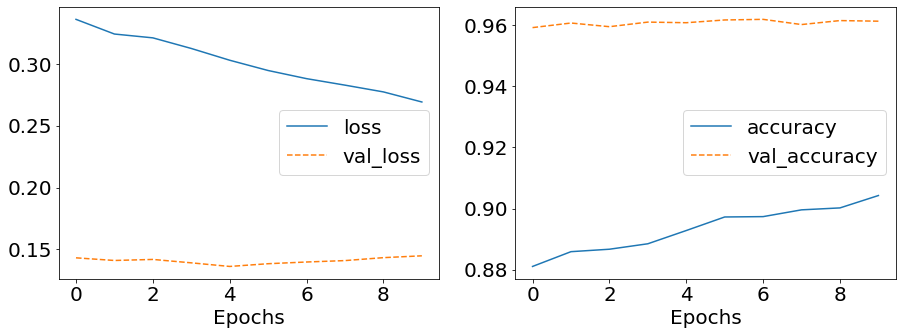

In [19]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)
training_plot(['loss', 'accuracy'], history);

The training model shows consistent improvement over the epochs, achieving high accuracy scores. The validation loss also remains relatively stable throughout training.

In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1429 - accuracy: 0.9587
Test Loss: 0.1429113745689392
Test Accuracy: 0.9587000012397766


The accuracy scores of both training and test datasets are pretty high at 96.13% and 95.87% respectively, which suggests that the model is performing well and generalizing effectively to unseen data.

The similar values of training and test loss indicate that the model is not overfitting, as the performance on the test data is consistent with the training data.

### Define the hyperparameters of the optimal model:

We use 'keras_tuner' to determine the optimal values of two hyperparameters: number of hidden layers, dropout rate in the hidden layer and learning rates.


In [14]:
pip install "keras-tuner[bayesian]"

Note: you may need to restart the kernel to use updated packages.


In [27]:
import kerastuner as kt
from keras_tuner.tuners import BayesianOptimization


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Tune the number of cells in the hidden layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))

    # Tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(keras.layers.Dropout(rate=hp_dropout))

    model.add(keras.layers.Dense(10, activation='softmax'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

    
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective('val_accuracy', 'max'),
    max_trials=10,
    num_initial_points=2,
    overwrite=True)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    
    
topN = 1
for x in range(topN):
  print(f"Optimal number of units: {tuner.get_best_hyperparameters(topN)[x].values}")
  print(f"Optimal dropout rate: {tuner.get_best_models(topN)[x].summary()}")     

Trial 10 Complete [00h 00m 45s]
val_accuracy: 0.9666000008583069

Best val_accuracy So Far: 0.98089998960495
Total elapsed time: 00h 06m 01s
Optimal number of units: {'units': 288, 'dropout': 0.0, 'learning_rate': 0.001}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 288)               226080    
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2890      
                                                                 
Total params: 228,970
Trainable params: 228,970
Non-trainable params: 0
___________________________

The model achieved the best validation accuracy of 98.08%, with the optimal hyperparameters identified as below:
- 288 units in the hidden layer
- A dropout rate of 0.0
- A learning rate of 0.001

### The accuracy scores of the optimal model on the test set:

In [28]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model on the entire training data
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2247 - accuracy: 0.9342
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0947 - accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0620 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0435 - accuracy: 0.9862
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9801
Test Accuracy: 0.9800999760627747


The accuracy scores of the optimal model on the test set is improving across epochs and finally reaches 98.01% which was pretty high, indicating a good performance on unseen test data. 

In [ ]:
End.